### Find The Parity Outlier [6]
You are given an array (which will have a length of at least 3, but could be very large) containing integers. The array is either entirely comprised of odd integers or entirely comprised of even integers except for a single integer N. Write a method that takes the array as an argument and returns this "outlier" N.

[2, 4, 0, 100, 4, 11, 2602, 36]
Should return: **11** (the only odd number)

[160, 3, 1719, 19, 11, 13, -21]
Should return: **160** (the only even number)

In [ ]:
def find_outlier(integers):
    if (integers[0] % 2 + integers[1] % 2 + integers[2] % 2) < 2: f = 0
    if (integers[0] % 2 + integers[1] % 2 + integers[2] % 2) > 1: f = 1  
    for i in range(len(integers)):
        if (f == 0 and integers[i] % 2 != 0) or (f == 1 and integers[i] % 2 == 0):
            return integers[i]

### Build a pile of Cubes [6]

Your task is to construct a building which will be a pile of $n$ cubes. The cube at the bottom will have a volume of $n^3$, the cube above will have volume of $(n-1)^3$ and so on until the top which will have a volume of $1^3$.

You are given the total volume m of the building. Being given m can you find the number n of cubes you will have to build?

The parameter of the function **find_nb** will be an integer m and you have to return the integer n such as $n^3 + (n-1)^3 + ... + 1^3 = m$,  
if such a n exists or -1 if there is no such $n$.

In [ ]:
def find_nb(m):
    n = 0
    while m != 0:
        n += 1
        m -= n**3
        if m < 0: return -1
    return n  

### Persistent Bugger [6]

Write a function, **persistence**, that takes in a positive parameter num and returns its multiplicative persistence, which is the number of times you must multiply the digits in num until you reach a single digit.

persistence(39)  => **3**   #  Because 3$*$9 = 27, 2$*$7 = 14, 1$*$4=4,  and 4 has only one digit                
persistence(999) => **4**   #  Because 9$*$9$*$9 = 729, 7$*$2$*$9 = 126, 1$*$2$*$6 = 12,  and finally 1$*$2 = 2             
persistence(4)   => **0**   #  Because 4 is already a one-digit number.                                          

In [ ]:
def persistence(n):
    total = 1
    count = 0
    while n > 9:  
        while n != 0:
            total *= n % 10
            n //= 10
        n, total = total, 1
        count += 1
    return count

### Moving Zeros To The End [5]

Write an algorithm that takes an array and moves all of the zeros to the end, preserving the order of the other elements.

move_zeros([False,1,0,1,2,0,1,3,"a"])    # returns[False,1,1,2,1,3,"a",0,0]

In [ ]:
def move_zeros(array):
    n, l = [], []
    for i in range(len(array)):
        if isinstance(array[i], (float, int)):
            if array[i] == 0 and len(str(array[i])) < 4:
                n.append(array[i])
            else:
                l.append(array[i])
        else: 
            l.append(array[i])
    return l + n

### Is a number prime? [6]

Define a function that takes one integer argument and returns logical value true or false depending on if the integer is a prime (per Wikipedia, a prime number (or a prime) is a natural number greater than 1 that has no positive divisors other than 1 and itself)

Requirements
You can assume you will be given an integer input.
You can not assume that the integer will be only positive. You may be given negative numbers as well (or 0).
NOTE on performance: There are no fancy optimizations required, but still the most trivial solutions might time out. Numbers go up to 2^31 (or similar, depends on language version). Looping all the way up to n, or n/2, will be too slow.

In [ ]:
def is_prime(num):
    f = 1
    if num <= 0: return False
    for i in range(2, int(num ** 0.5) + 1):
        if num % i == 0: f = 0
    return num > 1 and f == 1

print(is_prime(0))

### Highest Scoring Word [6]

Given a string of words, you need to find the highest scoring word. Each letter of a word scores points according to its position in the alphabet: a = 1, b = 2, c = 3 etc.  
You need to return the highest scoring word as a string.
If two words score the same, return the word that appears earliest in the original string. All letters will be lowercase.

In [ ]:
def high(x):
    cur, total, result = 0, 0, ''
    for word in x.split():
        for c in word:
            cur += (ord(c) - 96)  
        if cur > total:
            total = cur
            result = word
        cur = 0
    return result

### Extract the domain name from a URL [5]

Write a function that when given a URL as a string, parses out just the domain name and returns it as a string. For example:

domain_name("http://github.com/carbonfive/raygun") => "github"  
domain_name("http://www.zombie-bites.com") => "zombie-bites"  
domain_name("https://www.cnet.com") => "cnet"  
domain_name("http://google.com") => "google"  
domain_name("http://google.co.jp") => "google"  
domain_name("www.xakep.ru") => "xakep"

In [ ]:
def domain_name(url):
    for s in url.split('/'):
        if s.find(".") > 0:
            return s.split('.')[1] if s.split('.')[0] =='www' else s.split('.')[0] 

### Best travel [5]

John and Mary want to travel between a few towns A, B, C ... Mary has on a sheet of paper a list of distances between these towns. ls = [50, 55, 57, 58, 60]. John is tired of driving and he says to Mary that he doesn't want to drive more than t = 174 miles and he will visit only 3 towns. Which distances, hence which towns, they will choose so that the sum of the distances is the biggest possible to please Mary and John?

*Example:* With list ls and 3 towns to visit they can make a choice between: [50,55,57],[50,55,58],[50,55,60],[50,57,58],[50,57,60],[50,58,60],[55,57,58],[55,57,60],[55,58,60],[57,58,60].

The sums of distances are then: 162, 163, 165, 165, 167, 168, 170, 172, 173, 175.

The biggest possible sum taking a limit of 174 into account is then 173 and the distances of the 3 corresponding towns is [55, 58, 60].

The function chooseBestSum (or choose_best_sum or ... depending on the language) will take as parameters t (maximum sum of distances, integer >= 0), k (number of towns to visit, k >= 1) and ls (list of distances, all distances are positive or null integers and this list has at least one element). The function returns the "best" sum ie the biggest possible sum of k distances less than or equal to the given limit t, if that sum exists, or otherwise null.

*Examples:*
ts = [50, 55, 56, 57, 58] choose_best_sum(163, 3, ts) -> 163  

xs = [50] choose_best_sum(163, 3, xs) -> null  

ys = [91, 74, 73, 85, 73, 81, 87] choose_best_sum(230, 3, ys) -> 228  

Note: don't modify the input list ls

In [ ]:
def choose_best_sum(t, k, ls):
    from itertools import combinations
    n = combinations(ls, k)
    result = []
    for el in n:
        total = 0
        for i in el:
            total += i
        if total <= t:  
            result.append(total)
    return sorted(result)[-1] if len(result) > 0 else None

### The Speed of Letters [7]

Given a string as input, return a new string with each letter pushed to the right by its respective index in the alphabet.  

We all know that **A** is a slow and **Z** is a fast letter. This means that **Z** gets shifted to the right by 25 spaces, **A** doesn't get shifted at all, and **B** gets shifted by 1 space.  

You can assume the following things about your input:  

It will only contain uppercase letters from **A** to **Z**, no whitespaces or punctuation;
Input strings will not exceed 100 characters (although your output string might!)
Note that if 2 or more letters fall onto the same space after shifting, the latest character will be used. For example: **"BA"** --> **" A"**

In [ ]:
def speedify(st):
    d = dict()
    for i in range(len(st)):
        d[ord(st[i])-64+i] = st[i]
    if len(d) > 0:
        result = [' '] * max(d.keys()) 
        for key, value in d.items(): 
            result[key-1] = value
        return ''.join(result)
    else: return ''

### How many days are we represented in a foreign country? [7]

How many days are we represented in a foreign country?

My colleagues make business trips to a foreign country. We must find the number of days our company is represented in a country.   Every day that one or more colleagues are present in the country is a day that the company is represented. A single day cannot count for more than one day.

Write a function that recieves a list of pairs and returns the number of days that the company is represented in the foreign country. The first number of the pair is the number of the day of arrival and the second number of the pair is the day of departure of someone who travels, i.e. 1 january is number 1 and 31 of december is 365.

Example:
days_represented([[10,17],[200,207]]) --> Returns 16 because there are two trips of 8 days, which add up to 16.

In [ ]:
def days_represented(trips):
    result = 0
    top = 0
    for pairs in sorted(trips):     
        if pairs[1] > top:
            if pairs[0]  > top: result += pairs[1] - pairs[0] + 1 
            if pairs[0] == top: result += pairs[1] - pairs[0]
            if pairs[0]  < top: result += pairs[1] - top
            top = pairs[1]
    return result

### Snail [4]

Given an n x n array, return the array elements arranged from outermost elements to the middle element, traveling clockwise.

array = [[1,2,3],
         [4,5,6],
         [7,8,9]]   ...  snail(array) #=> [1,2,3,6,9,8,7,4,5]  


For better understanding, please follow the numbers of the next array consecutively: array = [[1,2,3],
         [8,9,4],
         [7,6,5]] ... snail(array) #=> [1,2,3,4,5,6,7,8,9]  
This image will illustrate things more clearly: 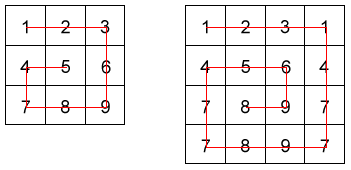

NOTE: The idea is not sort the elements from the lowest value to the highest; the idea is to traverse the 2-d array in a clockwise snailshell pattern.

NOTE 2: The 0x0 (empty matrix) is represented as en empty array inside an array [[]].

In [ ]:
def snail(sm):
    import numpy as np
    result = []
    while len(sm) != 0:                    # while there are elements in the matrix, repeat
        result.extend(sm[0])               # add the "top" row of the matrix to the result
        sm = np.delete(sm, 0, axis = 0)    # delete this row
        sm = np.rot90(sm)                  # rotate the remaining matrix 90 degrees counterclockwise
    return result

### The Hashtag Generator [5]

The marketing team is spending way too much time typing in hashtags. Let's help them with our own Hashtag Generator!

Here's the deal:

- It must start with a hashtag (#).
- All words must have their first letter capitalized.
- If the final result is longer than 140 chars it must return false.
- If the input or the result is an empty string it must return false. 

*Examples*  
" Hello there thanks for trying my Kata"  =>  "#HelloThereThanksForTryingMyKata"  
"    Hello     World   "                  =>  "#HelloWorld"  
""                                        =>  false  

In [1]:
def generate_hashtag(s):
    if len(s) == 0 or len(s) > 140: 
        return False
    return '#' + s.title().strip().replace(' ', '')

### Char Code Calculation [7]

Given a string, turn each character into its ASCII character code and join them together to create a number - let's call this number total1:   
'ABC' --> 'A' = 65, 'B' = 66, 'C' = 67 --> 656667  
Then replace any incidence of the number 7 with the number 1, and call this number 'total2':

$total1 = 656667$
              
$total2 = 656661$
              
Then return the difference between the sum of the digits in total1 and total2:

$(6 + 5 + 6 + 6 + 6 + 7) - (6 + 5 + 6 + 6 + 6 + 1) = 6$

In [ ]:
def calc(x):
    total = ''
    for c in x: total += str(ord(c))
    return int(total.count('7'))*6

### Find the odd int [6]

Given an array of integers, find the one that appears an odd number of times.

There will always be only one integer that appears an odd number of times.

In [ ]:
def find_it(seq):
    for i in seq:
        if seq.count(i) % 2 != 0: 
            return i

### Number to digit tiers [7]

Create a function that takes a number and returns an array of strings containing the number cut off at each digit.

Examples:  
420 should return ["4", "42", "420"]  
2017 should return ["2", "20", "201", "2017"]  
2010 should return ["2", "20", "201", "2010"]  
4020 should return ["4", "40", "402", "4020"]  
80200 should return ["8", "80", "802", "8020", "80200"]  
PS: The input is guaranteed to be an integer in the range [0, 1000000]

In [ ]:
def create_array_of_tiers(n):
    N = str(n)
    return [N[0:i] for i  in range(1, len(N)+1)]

### Maximum subarray sum [5]

The maximum sum subarray problem consists in finding the maximum sum of a contiguous subsequence in an array or list of integers:

max_sequence($[-2, 1, -3, 4, -1, 2, 1, -5, 4]$) should be $6$: [$4, -1, 2, 1]$  
Easy case is when the list is made up of only positive numbers and the maximum sum is the sum of the whole array. If the list is made up of only negative numbers, return 0 instead.

Empty list is considered to have zero greatest sum. Note that the empty list or array is also a valid sublist/subarray.

In [ ]:
def max_sequence(arr):
    if len(arr) == 0: return 0
    
    while arr[0] < 1: 
        del arr[0]
        if len(arr) == 0: return 0
        
    max, s = 0, 0
    for i in range(len(arr)):
        if arr[i] > 0: 
            start = i
        else: continue
        for j in range(start, len(arr)):
            s += arr[j]
            if s > max: max = s
        start = 0
        s = 0
    return max

### Stop gninnipS My sdroW! [6]

Write a function that takes in a string of one or more words, and returns the same string, but with all five or more letter words reversed (Just like the name of this Kata). Strings passed in will consist of only letters and spaces. Spaces will be included only when more than one word is present.

Examples: spin_words( "Hey fellow warriors" ) => returns "Hey wollef sroirraw"   
spin_words( "This is a test") => returns "This is a test"   
spin_words( "This is another test" )=> returns "This is rehtona test"

In [ ]:
def spin_words(sentence):
    return ' '.join([x[::-1] if len(x) > 4 else x  for x in sentence.split()])